# Dependencies / Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame creation

In [2]:
df = pd.read_csv("C:/Users/rerr_/OneDrive/Desktop/portafolio/data_science_eda/data/dirty_cafe_sales.csv")

# Exploring data

Taking an initial look into the dataset to understand its content.

In [3]:
# DataFrame shape (rows, columns)
df.shape

(10000, 8)

In [4]:
# Display the first few rows of the DataFrame
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [5]:
# DataFrame summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [6]:
# Data types of each column
df.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

In [7]:
# DataFrame statistics
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [8]:
# Check for null values
df.isna().sum()


Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

# Data cleaning

## categorical columns missing values

In [9]:
# Columns in the dataset that contain categorical values
categorical_missing_values_columns = ["Item", "Payment Method", "Location", "Transaction Date"]

# Iterate through those columns, normalizing the data and then replacing the NaN and Error values with Unknown
for column in categorical_missing_values_columns:
    print(f"Column {column} has {df[column].unique()} unique values.\n")
    df[column] = df[column].astype(str).str.strip().str.title()
    df[column] = df[column].replace(["Nan", "Error"], "Unknown")
    print(f"Updated column {column} has {df[column].unique()} unique values.")
    print("-" * 150)


Column Item has ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea'] unique values.

Updated column Item has ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'Unknown' 'Sandwich' 'Juice'
 'Tea'] unique values.
------------------------------------------------------------------------------------------------------------------------------------------------------
Column Payment Method has ['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan] unique values.

Updated column Payment Method has ['Credit Card' 'Cash' 'Unknown' 'Digital Wallet'] unique values.
------------------------------------------------------------------------------------------------------------------------------------------------------
Column Location has ['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR'] unique values.

Updated column Location has ['Takeaway' 'In-Store' 'Unknown'] unique values.
-----------------------------------------------------------------------------------------

## numerical columns missing values

In [10]:
# Columns in the dataset that contain numerical values
numerical_missing_values_columns = ["Quantity", "Price Per Unit", "Total Spent"]

# Calculate means of those columns (transform non-numeric values to NaN)
numerical_columns_means = {}
for column in numerical_missing_values_columns:
    df[column] = pd.to_numeric(df[column], errors="coerce")
    numerical_columns_means[column] = df[column].mean()

# Fill missing values (NaNs) with column mean
for column in numerical_columns_means:
    print(f"Column {column} has {df[column].unique()} unique values.\n")
    df[column] = df[column].fillna(numerical_columns_means[column])
    print(f"Updated column {column} has {df[column].unique()} unique values.")
    print("-" * 150)

Column Quantity has [ 2.  4.  5.  3.  1. nan] unique values.

Updated column Quantity has [2.        4.        5.        3.        1.        3.0284634] unique values.
------------------------------------------------------------------------------------------------------------------------------------------------------
Column Price Per Unit has [2.  3.  1.  5.  4.  1.5 nan] unique values.

Updated column Price Per Unit has [2.         3.         1.         5.         4.         1.5
 2.94998416] unique values.
------------------------------------------------------------------------------------------------------------------------------------------------------
Column Total Spent has [ 4.  12.   nan 10.  20.   9.  16.  15.  25.   8.   5.   3.   6.   2.
  1.   7.5  4.5  1.5] unique values.

Updated column Total Spent has [ 4.        12.         8.9243525 10.        20.         9.
 16.        15.        25.         8.         5.         3.
  6.         2.         1.         7.5        4.5      

In [11]:
# Transform "Quantity" to int, while rounding-up "Price Per Unit" and "Total Spent" to 2 decimals
df["Quantity"] = df["Quantity"].round().astype(int)

df["Price Per Unit"] = df["Price Per Unit"].round(2)
df["Total Spent"] = df["Total Spent"].round(2)

# Corroborating
for column in numerical_columns_means:
    print(f"Column {column} has {df[column].unique()} unique values.\n")
    print("-" * 150)

Column Quantity has [2 4 5 3 1] unique values.

------------------------------------------------------------------------------------------------------------------------------------------------------
Column Price Per Unit has [2.   3.   1.   5.   4.   1.5  2.95] unique values.

------------------------------------------------------------------------------------------------------------------------------------------------------
Column Total Spent has [ 4.   12.    8.92 10.   20.    9.   16.   15.   25.    8.    5.    3.
  6.    2.    1.    7.5   4.5   1.5 ] unique values.

------------------------------------------------------------------------------------------------------------------------------------------------------


In [12]:
df.isna().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

## "Transaction Date" column to Datetime type (and adding new columns)

In [13]:
df["Transaction Date"].dtype

dtype('O')

In [14]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")
df["Transaction Date"].dtype

dtype('<M8[ns]')

In [15]:
# Create month column to analyze sales per month
df["Month"] = df["Transaction Date"].dt.month_name()
df["Month"]

0       September
1             May
2            July
3           April
4            June
          ...    
9995       August
9996         June
9997        March
9998     December
9999     November
Name: Month, Length: 10000, dtype: object

In [16]:
# Order "Month" chronologically, not alphabetically
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True)

# Data Viz

# Products sold per quantity

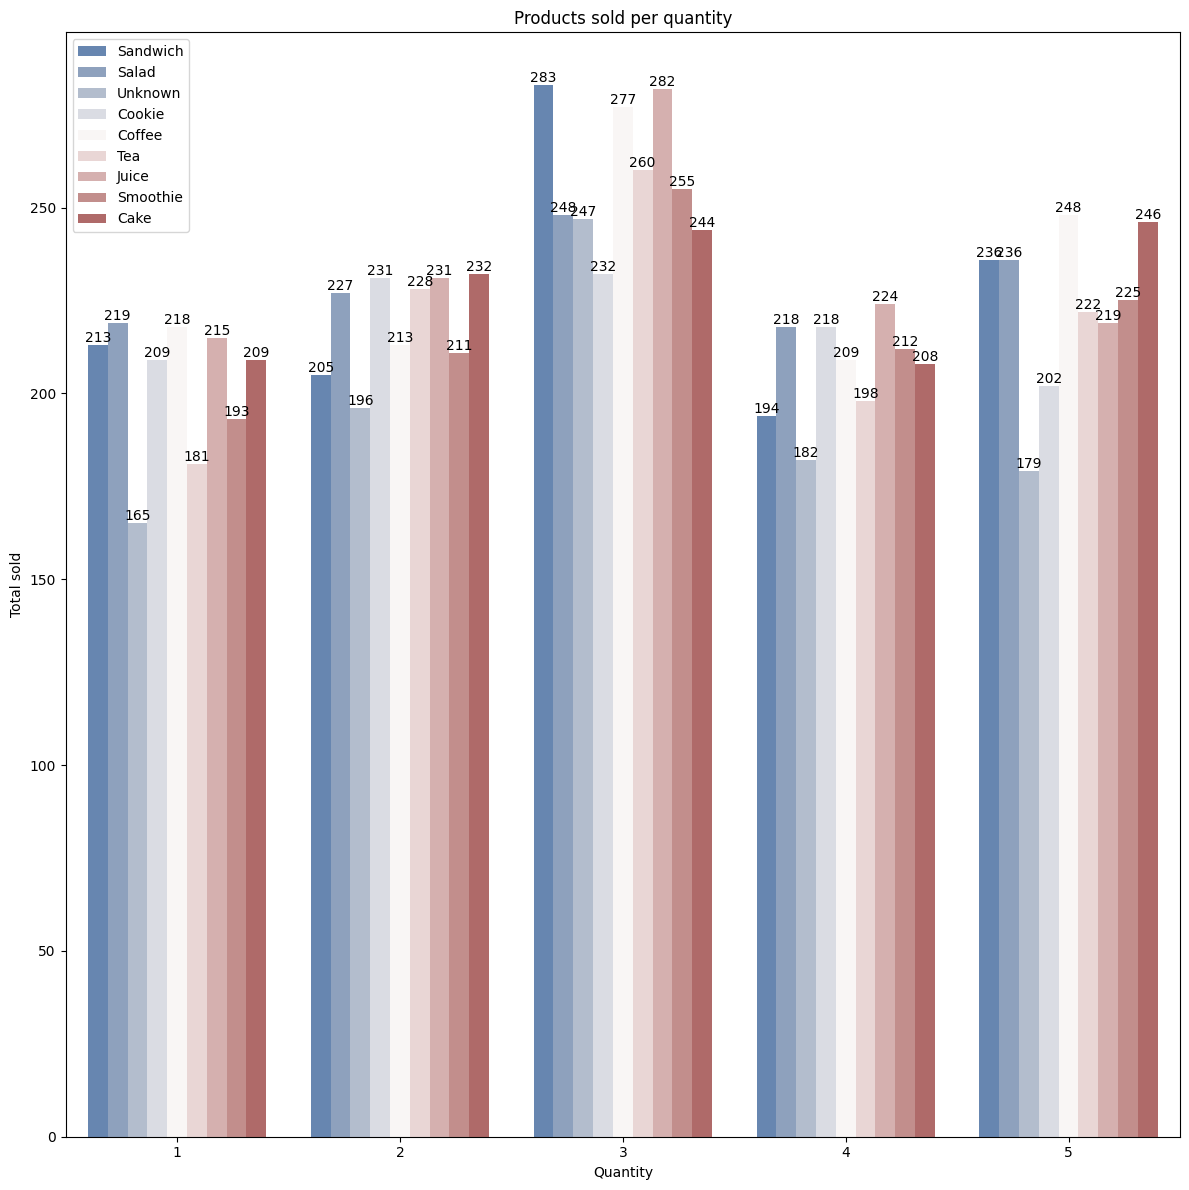

In [17]:
plt.figure(figsize=(12, 12))

ax = sns.countplot(data=df,
            x="Quantity",
            hue="Item",
            palette="vlag",
            stat="count")

for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=10)

plt.title("Products sold per quantity")
plt.legend(loc="upper left")
plt.ylabel("Total sold")
plt.tight_layout()

## products sold per quantity per location

Text(0, 0.5, 'Total sold')

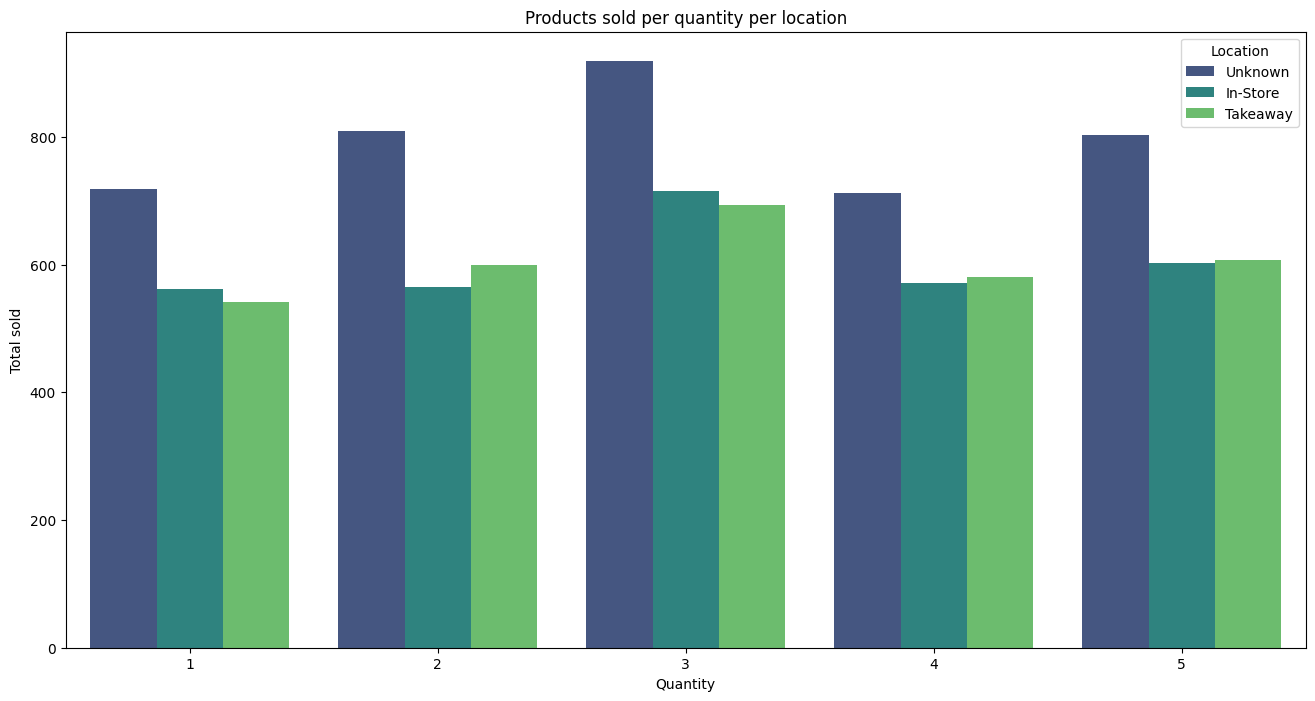

In [18]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df,
            x="Quantity",
            hue="Location",
            palette="viridis",
            stat="count")
plt.title("Products sold per quantity per location")
plt.ylabel("Total sold")

## products sold through time

C:\Users\rerr_\AppData\Local\Temp\ipykernel_1424\2911451217.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby(["Month", "Item"], as_index=False)["Total Spent"].sum()
C:\Users\rerr_\AppData\Local\Temp\ipykernel_1424\2911451217.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order, rotation=45)
C:\Users\rerr_\AppData\Local\Temp\ipykernel_1424\2911451217.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order, rotation=45)
C:\Users\rerr_\AppData\Local\Temp\ipykernel_1424\2911451217.py:18: UserWarning: set_ticklabels() should only be used with a fixed

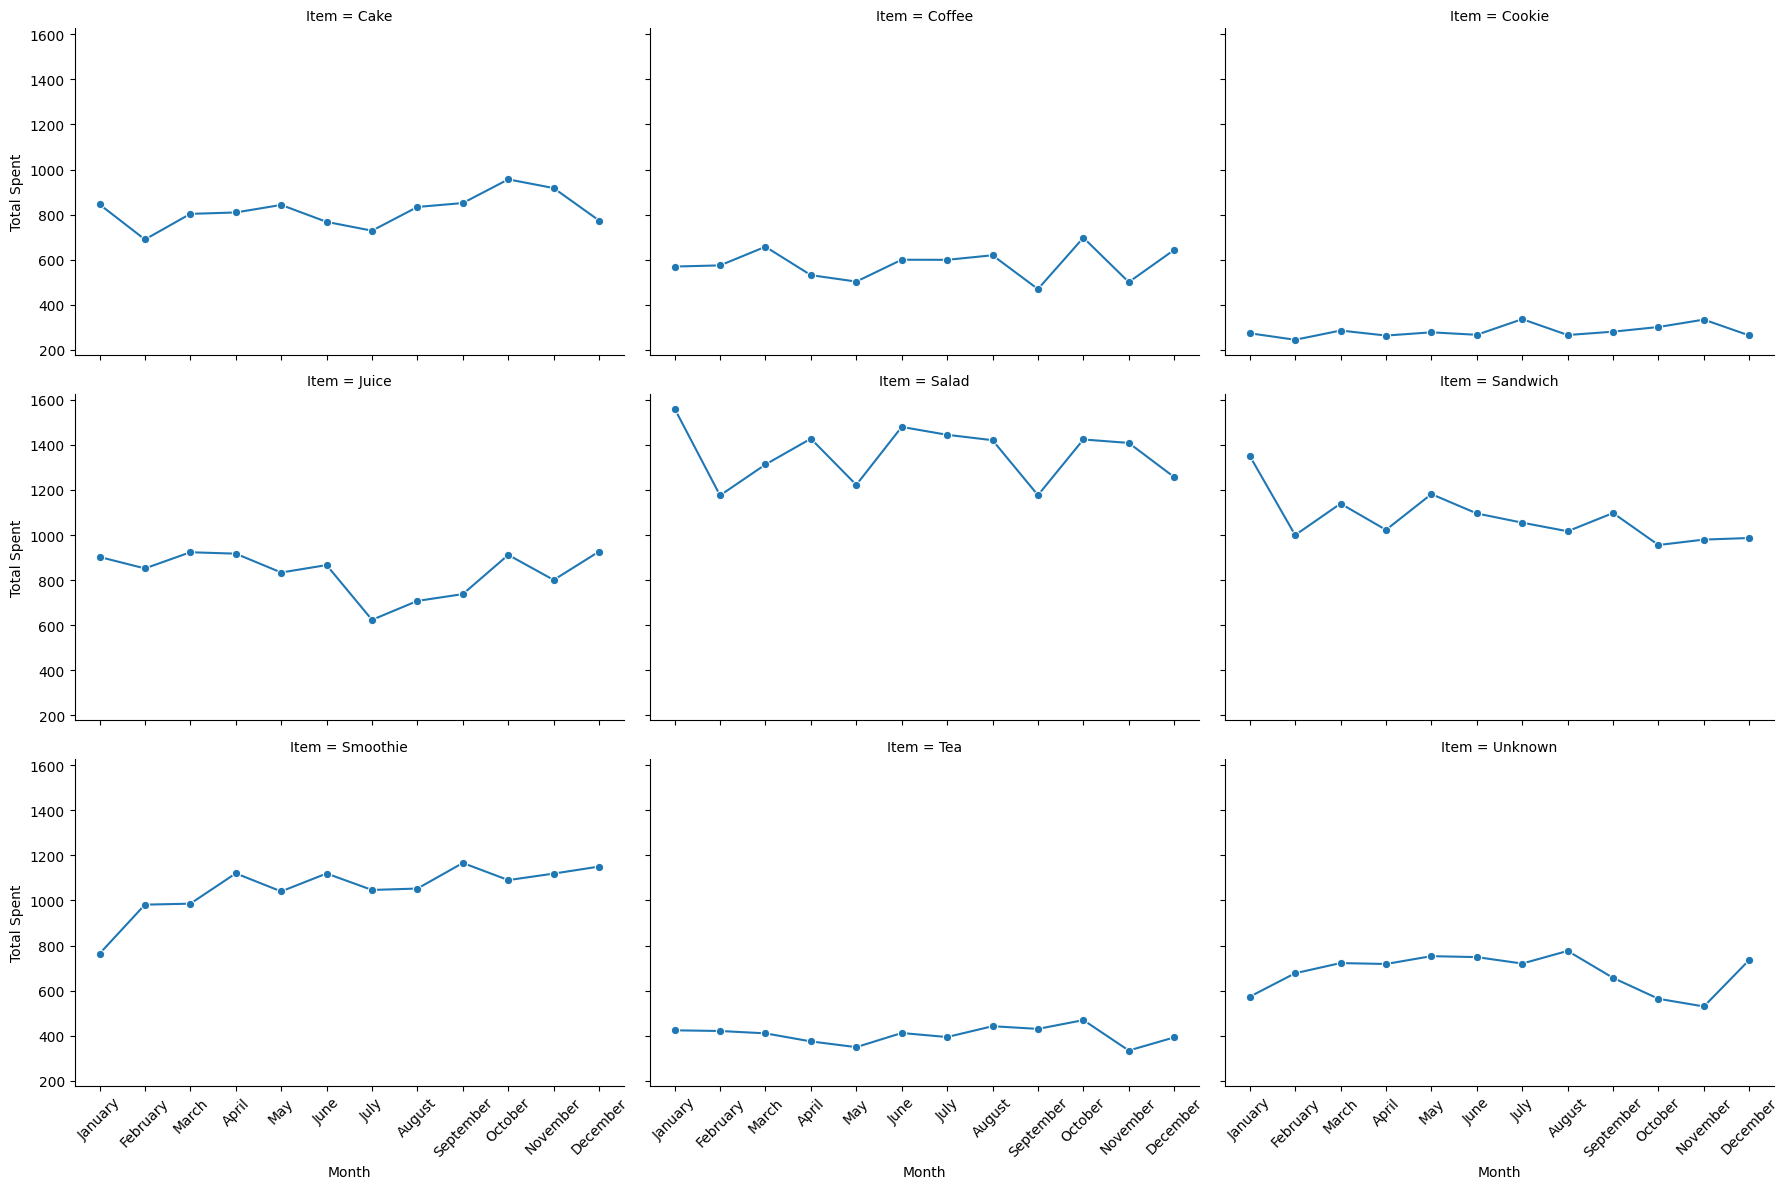

In [19]:
# Group by month to visualize monthly sales
monthly_sales = df.groupby(["Month", "Item"], as_index=False)["Total Spent"].sum()

g = sns.relplot(
    data=monthly_sales,
    x="Month",
    y="Total Spent",
    kind="line",          
    col="Item",           
    col_wrap=3,           
    height=4,
    aspect=1.5,
    marker="o"
)

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticklabels(month_order, rotation=45)

plt.tight_layout()